In [1]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

# 1. Load your feature-extracted dataset
# Ensure this file contains the numerical features we created earlier
# Use forward slashes to avoid escape-sequence issues with backslashes
df = pd.read_csv('../datasets/feature_extracted_data.csv')

# Drop non-numerical columns and separate target
X = df.drop(['url', 'label'], axis=1) 
y = df['label']

# 2. Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize Models
models = {
    "LightGBM": lgb.LGBMClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 4. Train and Evaluate
comparison_list = []

for name, model in models.items():
    print(f"Training {name}...")
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        "Algorithm": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Training Time (s)": round(training_time, 4)
    }
    comparison_list.append(metrics)

# 5. Display Results
comparison_df = pd.DataFrame(comparison_list)
print("\n--- Model Performance Comparison ---")
print(comparison_df.sort_values(by='F1-Score', ascending=False))

Training LightGBM...
[LightGBM] [Info] Number of positive: 42545, number of negative: 42650
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003806 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 424
[LightGBM] [Info] Number of data points in the train set: 85195, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499384 -> initscore=-0.002465
[LightGBM] [Info] Start training from score -0.002465
Training XGBoost...


c:\Users\Namitha Anna Koshy\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:47:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Random Forest...

--- Model Performance Comparison ---
       Algorithm  Accuracy  Precision    Recall  F1-Score  Training Time (s)
1        XGBoost  0.995774   0.997655  0.993926  0.995787             0.3198
0       LightGBM  0.995774   0.997935  0.993646  0.995786             0.3934
2  Random Forest  0.995446   0.997747  0.993179  0.995458             1.8769



--- Model Performance Comparison ---
       Algorithm  Accuracy  Precision    Recall  F1-Score  Training Time (s)
1        XGBoost  0.995774   0.997655  0.993926  0.995787             0.2147
0       LightGBM  0.995774   0.997935  0.993646  0.995786             0.2048
2  Random Forest  0.995446   0.997747  0.993179  0.995458             1.3177

🏆 The Best Model is: XGBoost


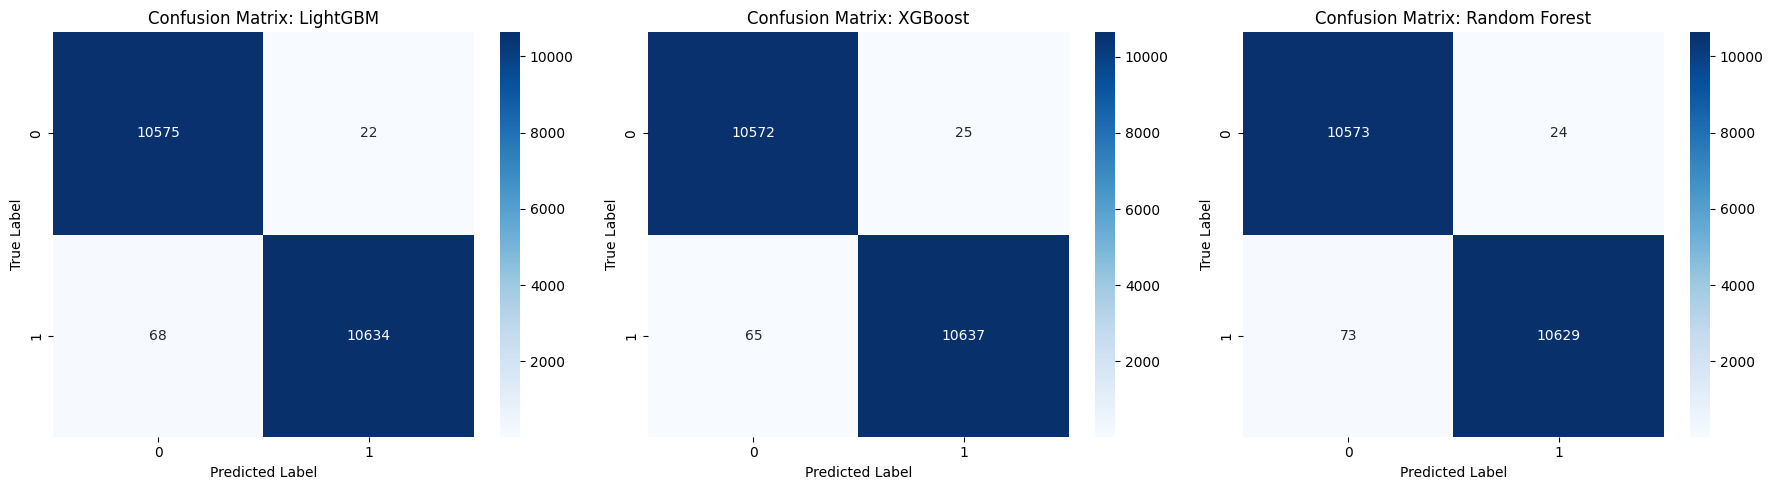

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# 5. Display Results and Visualizations
comparison_df = pd.DataFrame(comparison_list)
print("\n--- Model Performance Comparison ---")
print(comparison_df.sort_values(by='F1-Score', ascending=False))

# 6. Automatic Best Model Detection
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Algorithm']
print(f"\n🏆 The Best Model is: {best_model_name}")

# 7. Plotting Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i], cmap='Blues')
    axes[i].set_title(f"Confusion Matrix: {name}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

plt.tight_layout()
plt.show()

C:\Users\Namitha Anna Koshy\AppData\Local\Temp\ipykernel_3160\3345789007.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Algorithm', y='Training Time (s)', data=df_time, palette='magma')


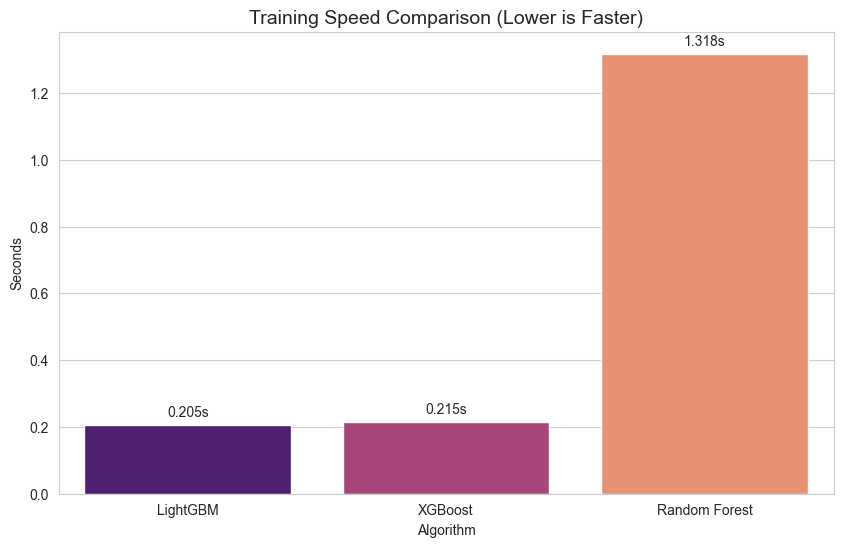

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data from your previous run
data = {
    'Algorithm': ['LightGBM', 'XGBoost', 'Random Forest'],
    'Training Time (s)': [0.2048, 0.2147, 1.3177]
}
df_time = pd.DataFrame(data)

# Create the plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x='Algorithm', y='Training Time (s)', data=df_time, palette='magma')

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}s', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.title('Training Speed Comparison (Lower is Faster)', fontsize=14)
plt.ylabel('Seconds')
plt.show()

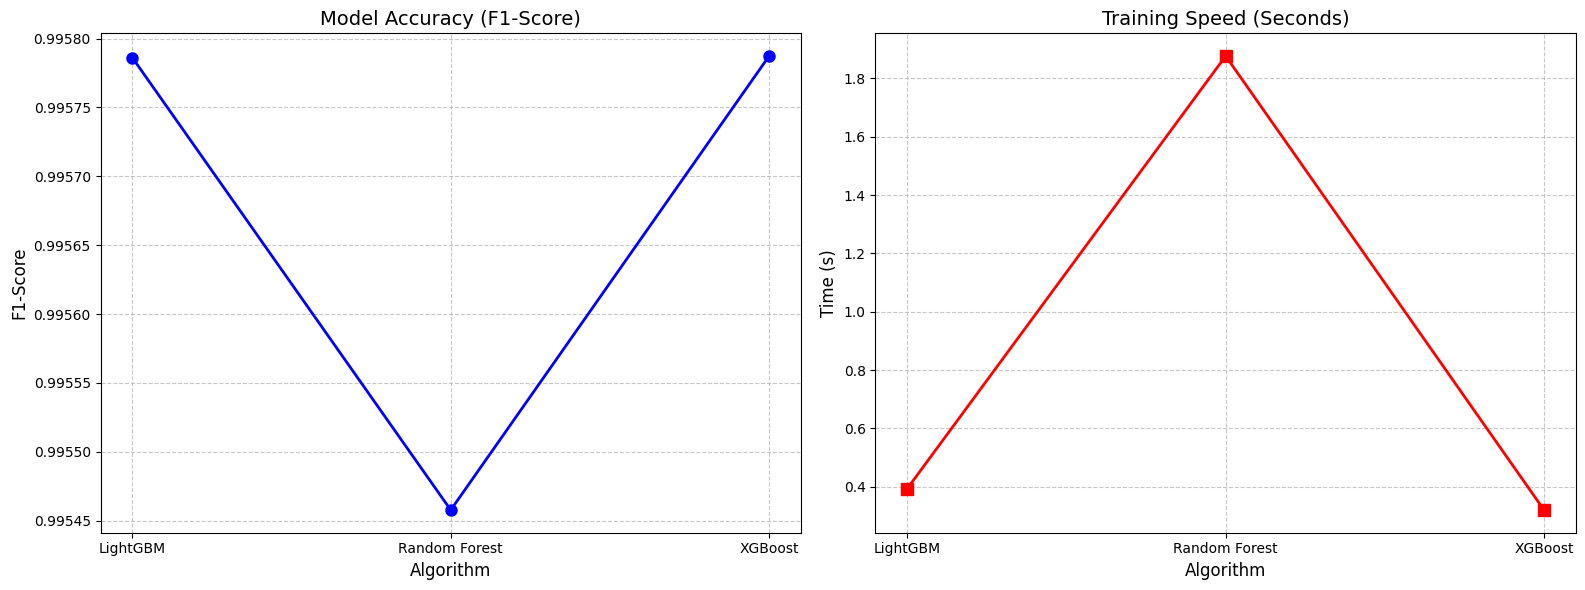

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure with two side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Accuracy Plot (F1-Score)
ax1.plot(comparison_df['Algorithm'], comparison_df['F1-Score'], 
         marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
ax1.set_title('Model Accuracy (F1-Score)', fontsize=14)
ax1.set_ylabel('F1-Score', fontsize=12)
ax1.set_xlabel('Algorithm', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

# 2. Speed Plot (Training Time)
ax2.plot(comparison_df['Algorithm'], comparison_df['Training Time (s)'], 
         marker='s', linestyle='-', color='r', linewidth=2, markersize=8)
ax2.set_title('Training Speed (Seconds)', fontsize=14)
ax2.set_ylabel('Time (s)', fontsize=12)
ax2.set_xlabel('Algorithm', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()